In [420]:
from sympy import *
init_printing()

In [494]:
A  = Symbol('A', real=True, positive=True)
N  = Symbol('N', odd=True)
nu = Symbol('nu', positive=True, real=True)

In [422]:
def lambda_n(n_num: Integer, A_num: RealNumber=A, N_num: Integer=N):
    symb = symbols('\\lambda_{{{}}}'.format(n_num).replace(' ',''))
    coef = 2*(-1)**((n_num-1)/2)/n_num/pi * (2/A_num)**n_num * binomial((N_num+n_num)/2,(N_num-n_num)/2)

    return Eq(symb,coef)

In [599]:
from matplotlib import pyplot
from numpy import arange, linspace, argmin, log as np_log, asarray, abs as np_abs
import numpy as np
from sympy import N as numeric_value_of

A condição abaixo para $A$ garante que $\lambda_1 == \lambda_N$.

In [798]:
eq = Eq(1/N*(2/A)**N, (N+1)/A)
sol = solve(eq, A)[0]
display(eq)
display(Eq(Symbol('A'), sol))

In [483]:
sol.subs(N, N_num)

1.993939393939394


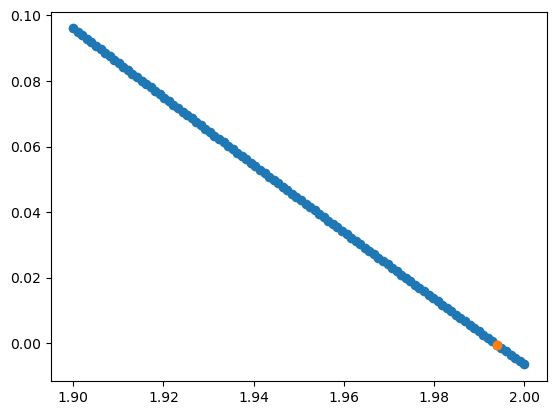

In [464]:
N_num = Integer(5001)

funky = lambda x: 2*log(x)/N_num

A_array = linspace(1.9, 2, 100)

def f(A_num):
    num = funky(lambda_n(N_num, A_num, N_num).rhs)
    den = funky(lambda_n(1, A_num, N_num).rhs)

    return num-den

ratios = asarray([f(A_num) for A_num in A_array])

pyplot.scatter(A_array, ratios)

index_nearest_to_zero = argmin(np_abs(ratios))
print(A_array[index_nearest_to_zero])
pyplot.scatter(A_array[index_nearest_to_zero], ratios[index_nearest_to_zero])


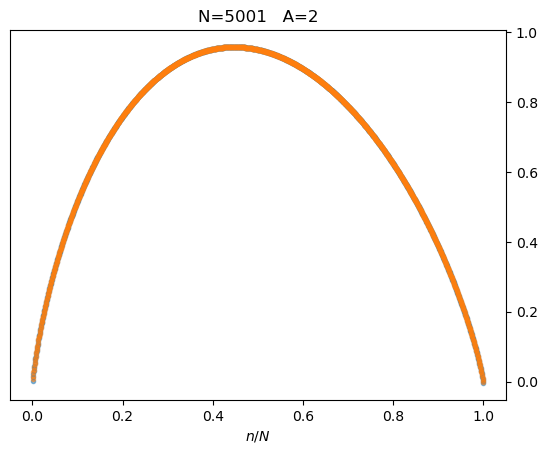

In [970]:
N_num = Integer(5001)
#A_num = float(2**Rational(N_num,N_num-1)*(N_num*(N_num+1))**Rational(-1,N_num-1))
A_num = 2

kappa = 10
#funky = lambda x: exp(kappa*2*log(x)/N_num/3)
funky = lambda x: 2*log(x)/N_num
#funky = lambda x: x

funky_n = lambda x: x/N_num

lambdas_positive = [ lambda_n(Integer(n_num), A, N_num).rhs for n_num in range(1, N_num+2, 4) ]
lambdas_negative = [-lambda_n(Integer(n_num), A, N_num).rhs for n_num in range(3, N_num+2, 4) ]

lambdas_positive_num = asarray([ numeric_value_of(funky(lamby.subs(A, float(A_num)))) for lamby in lambdas_positive])
lambdas_negative_num = asarray([ numeric_value_of(funky(lamby.subs(A, float(A_num)))) for lamby in lambdas_negative])

n_positive = funky_n(arange(1, N_num+2, 4))
n_negative = funky_n(arange(3, N_num+2, 4))

ax = pyplot.scatter(n_positive, lambdas_positive_num, marker='.', alpha=0.5)
pyplot.scatter(n_negative, lambdas_negative_num, marker='.', alpha=0.5)
pyplot.xlabel('$n/N$')
#pyplot.ylabel('$\\left(\\dfrac{2}{N}\\text{log}|\\lambda_n|\\right)$')
pyplot.title(f"N={N_num}   A={A_num}")

ax.axes.yaxis.tick_right()
ax.axes.yaxis.set_label_position("right")


In [971]:
def Gamma(nu_, N_):
    N2 = N_/2
    nuN = nu_*N_
    
    factor = (1+nu_)/(1-nu_)/nuN

    num = gamma(N2*(1+nu_))
    den = gamma(N2*(1-nu_))*gamma(nuN)

    return factor * num/den

Gamma(nu, N)

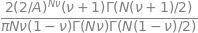

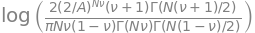

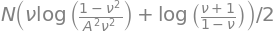

In [972]:
L = 2/pi * Gamma(nu, N) * (2/A)**(nu*N)
display(L)

funky_a = log(L)

# obs log(2/A)|_{A=2} = 0
funky_b = log(2/pi) + nu*N*log(2/A) - log(nu*N) + log((1+nu)/(1-nu)) + log(gamma(N/2 * (1+nu))) - log(gamma(N/2 * (1-nu))) - log(gamma(nu*N))

funky_c = log(gamma(N/2 * (1+nu))) - log(gamma(N/2 * (1-nu))) - log(gamma(N*nu)) + N*nu*log(2/A)

funky_d = (N/2) * (log((1+nu)/(1-nu)) + nu*log((1-nu**2)/A**2/nu**2))

display(funky_a)
display(funky_b)
display(funky_c)
display(funky_d)

In [975]:
decimation_n = 50
n_dec = n_positive
lambdas_dec = lambdas_positive_num
if decimation_n != 0:
    n_dec = n_dec[::decimation_n]
    lambdas_dec = lambdas_dec[::decimation_n]

print(len(n_positive))
len(n_dec)

1251


In [986]:
import numpy as np

dnu = 1/N_num
nu_num = linspace(float(dnu),float(1-dnu), N_num)

func = 2/N*funky_d.subs(A, A_num)
funky_N = func.subs(N, N_num)
# Z = exp(-N_num/2)
funky_num = asarray([((funky_N.subs(nu, nu_))) for nu_ in nu_num])

N=5001   A=2


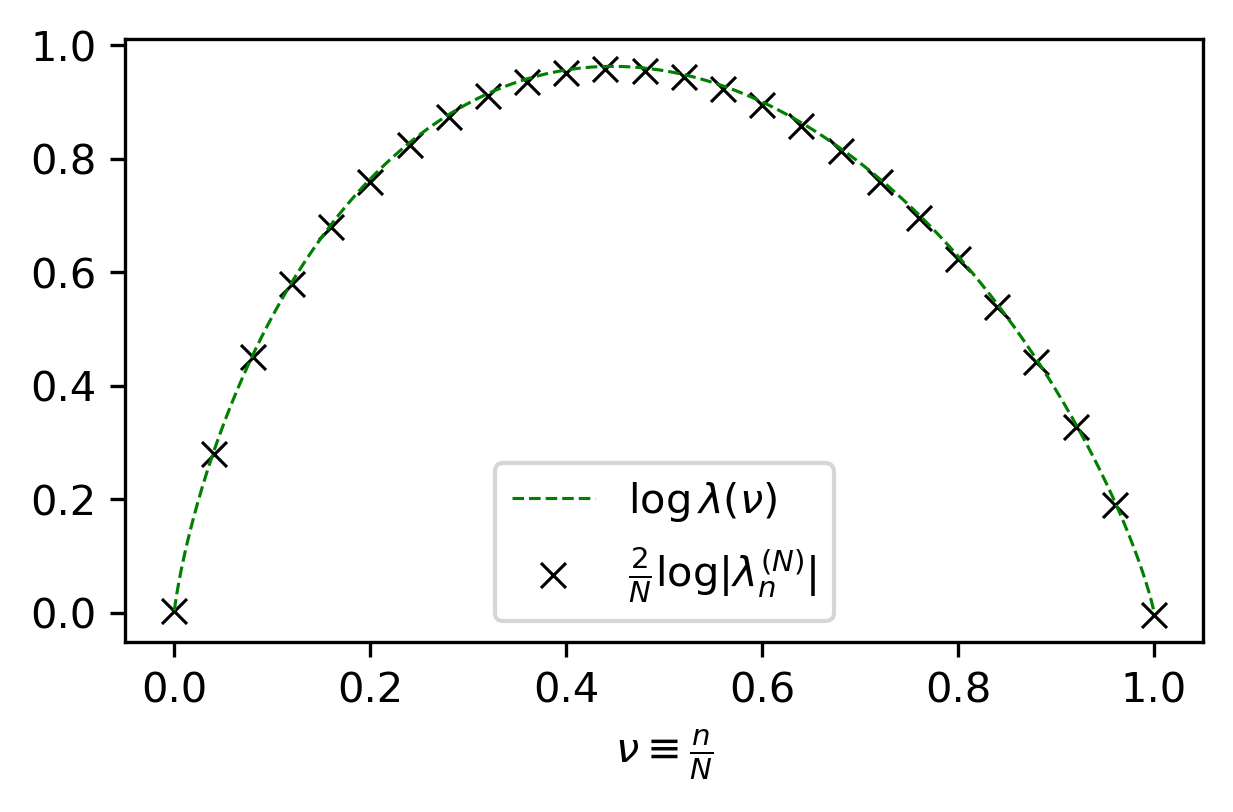

In [989]:
print(f"N={N_num}   A={A_num}")

LaTEXTextWidthInches = 6.47699

pyplot.figure(figsize=[1.3*LaTEXTextWidthInches/2, 1.3*LaTEXTextWidthInches/3], dpi=300)
#pyplot.figure(figsize=(LaTEXTextWidthInches, LaTEXTextWidthInches/2), dpi=300)
pyplot.plot(nu_num, funky_num, color='g', lw=0.75, linestyle='--', label='$\\log \\lambda(\\nu)$')
pyplot.scatter(n_dec, lambdas_dec, marker='x', alpha=1, color='k', label='$\\frac{2}{N}\\log|\\lambda_n^{(N)}|$', lw=0.75)
pyplot.xlabel('$\\nu\\equiv\\frac{n}{N}$')
#pyplot.ylabel('$\\log\\left[\\lambda(\\nu)\\right],\\frac{2}{N}\\log[\\lambda_n^{(N)}]$')
pyplot.ylabel('')
pyplot.legend()

pyplot.tight_layout()

file_path = '/home/joao/Dropbox/Fisica/Producao/MassSignum/lambda_nu.png'
# Save the plot to the specified location with the specified name
# pyplot.savefig(file_path)

pyplot.show()

Text(0.5, 0, '$\\nu$')

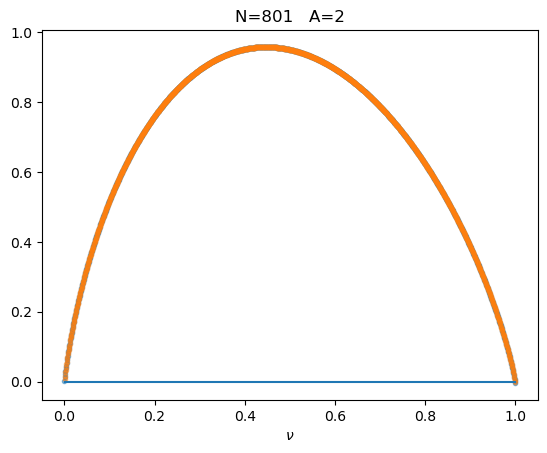

In [855]:
pyplot.plot(nu_num, funky_num)
pyplot.scatter(n_positive, lambdas_positive_num, marker='.', alpha=0.5)
pyplot.scatter(n_negative, lambdas_negative_num, marker='.', alpha=0.5)
pyplot.title(f"N={N_num}   A={A_num}")
pyplot.xlabel('$\\nu$')

Text(0, 0.5, '$\\lambda_N(\\nu)$')

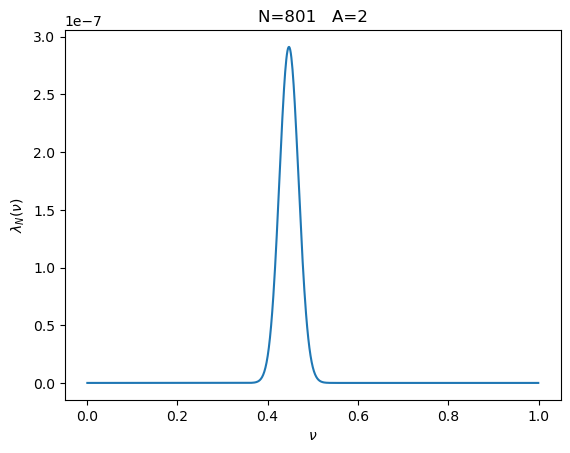

In [853]:
pyplot.plot(nu_num, funky_num)
pyplot.title(f"N={N_num}   A={A_num}")
pyplot.xlabel('$\\nu$')
pyplot.ylabel('$\\lambda_N(\\nu)$')

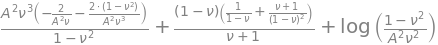

In [854]:
funky_d.subs(N,2).diff(nu)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_346386/4120563781.py:17: SyntaxWarning: invalid escape sequence '\d'
  pyplot.ylabel('$\dfrac{2}{N}\,\dfrac{d\Lambda(\\nu)}{d\\nu}$')


Text(0.5, 0, '$\\nu$')

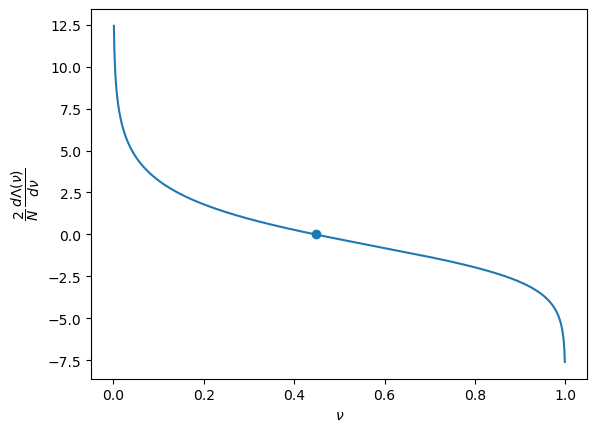

In [759]:
temp = funky_d.subs(N,2).diff(nu)
temp = lambdify(nu, temp)
x_points = linspace(1e-3,1-1e-3, 10000)
y_points = temp(x_points)

pyplot.plot(x_points, y_points)

index_nearest_to_zero = argmin(np_abs(y_points))

nu_max = x_points[index_nearest_to_zero]
L_max = (2/N)*funky_d.subs(nu, x_points[index_nearest_to_zero])

display(Eq(Symbol('x_0'), x_max))
display(Eq(Symbol('\\nu_{{{max}}}'), nu_max))
pyplot.scatter(x_points[index_nearest_to_zero], y_points[index_nearest_to_zero])

pyplot.ylabel('$\dfrac{2}{N}\,\dfrac{d\Lambda(\\nu)}{d\\nu}$')
pyplot.xlabel('$\\nu$')


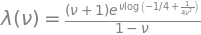

In [760]:
Lambda = 2/N * funky_d
lambda_nu = exp(Lambda)

display(Eq(Function('Lambda')(nu), Lambda))
display(Eq(Function('lambda')(nu), lambda_nu))

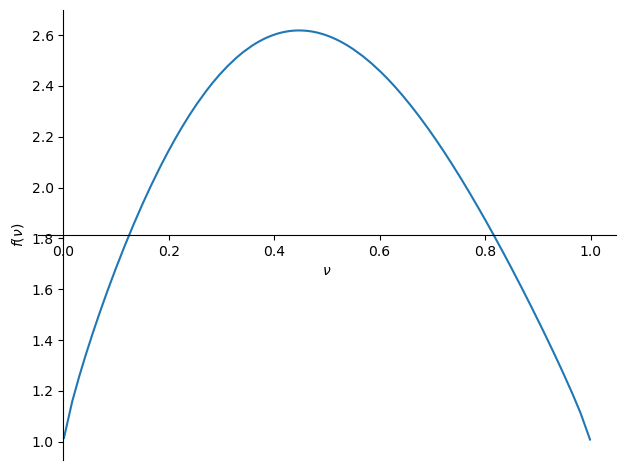

In [796]:
plot(lambda_nu, (nu, 1e-3, 1-1e-3))

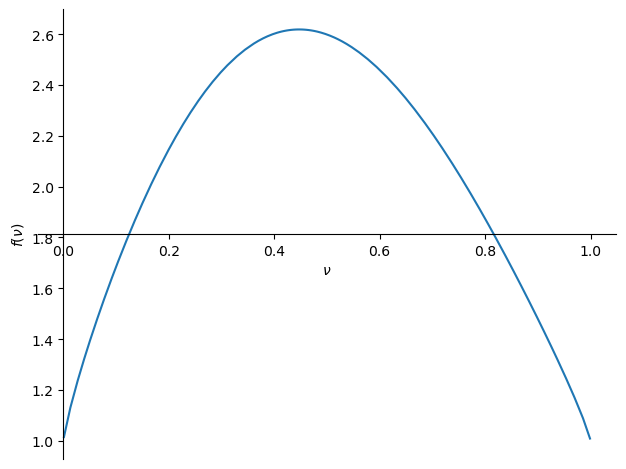

In [795]:
w = -(nu+1)/(nu-1) * ((1-nu**2)/(4*nu**2))**nu
w_max = w.subs(nu, nu_max)

plot(w, (nu, 1e-3, 1-1e-3))

In [768]:
float(E)-1/10